In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.compose import ColumnTransformer
import time
from utils import dataset_summary

In [4]:
train = pd.read_csv('../data/X_train.csv')
test =  pd.read_csv('../data/X_test.csv')
sample_submission = pd.read_csv('../data/sample_submission.csv')#This is a file with random numbers as predictions

In [5]:
train.shape

(1285000, 14)

In [6]:
train.head()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4


In [7]:
train.tail()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
1284995,9.84375,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,0.973131,0.384048,1.008133,1284995
1284996,9.88281,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,1.011822,0.378533,0.973406,1284996
1284997,9.92188,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,1.049218,0.373027,0.941717,1284997
1284998,9.96094,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,1.085428,0.367788,0.912645,1284998
1284999,10.00000,-0.163264,-0.618197,1.029575,-2.079003,-0.046730,-0.502346,-1.392434,1.193499,0.209994,1.120543,0.362860,0.885505,1284999


In [8]:
train.head(260)

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,9.960940,1.491492,1.199018,-0.063145,0.595242,1.018416,1.248499,0.674080,-0.034194,-2.509908,-2.447517,-0.610936,-0.561048,255
256,10.000000,1.485476,1.222565,-0.250131,0.609230,1.048258,1.246830,0.859066,-0.050144,-2.533734,-2.469395,-0.608935,-0.559086,256
257,0.000000,1.000000,0.000000,0.000000,0.000000,-0.176502,0.555739,0.000000,0.000000,-0.823498,-0.555739,0.000000,0.000000,257
258,0.039062,0.999392,0.000131,-0.031160,0.006723,-0.176326,0.555148,0.008985,-0.030279,-0.823065,-0.555279,0.022176,0.023556,258


In [9]:
train[513:513+260]#example

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
513,10.000000,-6.620778,3.202247,-0.532136,0.287855,3.322901,-1.466720,-0.899632,-0.569780,3.297877,-1.735527,1.431768,0.281925,513
514,0.000000,1.000000,0.000000,0.000000,0.000000,-0.450789,0.177112,0.000000,0.000000,-0.549211,-0.177112,0.000000,0.000000,514
515,0.039062,0.999333,0.000008,-0.034141,0.000384,-0.451961,0.171573,-0.060881,-0.286582,-0.547372,-0.171580,0.095022,0.286198,515
516,0.078125,0.997331,0.000029,-0.068445,0.000723,-0.455692,0.154201,-0.133362,-0.614370,-0.541639,-0.154230,0.201807,0.613648,516
517,0.117188,0.993982,0.000063,-0.103077,0.000973,-0.462828,0.121989,-0.241929,-1.070037,-0.531154,-0.122051,0.345006,1.069064,517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,768
769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,769
770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,770
771,0.000000,1.000000,0.000000,0.000000,0.000000,-0.081487,0.726750,0.000000,0.000000,-0.918513,-0.726750,0.000000,0.000000,771


In [10]:
train[1284:1284+260]#example with collision 

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
1284,10.000000,0.723352,-1.444826,-0.251241,0.020408,-0.377848,0.467675,1.140102,-0.180309,-0.345504,0.977151,-0.888861,0.159901,1284
1285,0.000000,1.000000,0.000000,0.000000,0.000000,-0.471512,0.002251,0.000000,0.000000,-0.528488,-0.002251,0.000000,0.000000,1285
1286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1286
1287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1287
1288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1539
1540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1540
1541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1541
1542,0.000000,1.000000,0.000000,0.000000,0.000000,-0.080147,0.355682,0.000000,0.000000,-0.919853,-0.355682,0.000000,0.000000,1542


In [11]:
train.columns,

(Index(['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2',
        'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id'],
       dtype='object'),)

In [12]:
train.shape

(1285000, 14)

In [13]:
number_lines=train.shape[0]
time_interval=257
number_trajectory=number_lines/time_interval
print(f'Number of traj : {number_trajectory}')


Nombre de trajectoires : 5000.0


In [14]:
idx = np.hstack((0,train[train.t==10].index.values+1))
idx.shape, train.t.min(), train.t.max() 

((4054,), 0.0, 10.0)

In [15]:
print(f'Number of traj without collision: {idx.shape[0]}')
print(f'Number of traj with collision: {number_trajectory-idx.shape[0]}')

Nombre de trajectoires sans collision: 4054
Nombre de trajectoires avec collision: 946.0


In [16]:
idx #donne tous les indices +1 des trajectoires qui ont fini sans collision

array([      0,     257,     514, ..., 1284486, 1284743, 1285000])

In [17]:
train[train.t==10] #toutes les indices où une trajectoire se termine sans collision

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
256,10.0,1.485476,1.222565,-0.250131,0.609230,1.048258,1.246830,0.859066,-0.050144,-2.533734,-2.469395,-0.608935,-0.559086,256
513,10.0,-6.620778,3.202247,-0.532136,0.287855,3.322901,-1.466720,-0.899632,-0.569780,3.297877,-1.735527,1.431768,0.281925,513
1027,10.0,-0.571494,-0.080697,0.179598,0.438129,0.027242,0.941225,-0.337390,-0.040624,0.544252,-0.860529,0.157792,-0.397505,1027
1284,10.0,0.723352,-1.444826,-0.251241,0.020408,-0.377848,0.467675,1.140102,-0.180309,-0.345504,0.977151,-0.888861,0.159901,1284
1798,10.0,-0.571648,1.095401,0.258019,-0.394434,0.243165,-0.222730,-0.308929,0.562921,0.328483,-0.872672,0.050909,-0.168487,1798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283971,10.0,-10.521958,1.545332,-1.056849,0.174263,5.248843,-0.664276,-0.864265,-0.033684,5.273115,-0.881057,1.921115,-0.140579,1283971
1284228,10.0,0.311324,0.118711,-0.869690,-0.581231,-0.435548,0.589852,0.531802,-0.142515,0.124224,-0.708563,0.337888,0.723746,1284228
1284485,10.0,-0.917666,-2.512581,-0.111736,-0.619204,-1.049653,-2.067444,0.035571,0.407810,1.967319,4.580025,0.076165,0.211394,1284485
1284742,10.0,-0.334211,-0.251147,-1.915656,-0.884303,-0.347886,-0.129399,2.967301,1.166792,0.682097,0.380546,-1.051645,-0.282489,1284742


In [18]:
index_begin_trajectory=np.arange(0, number_lines,time_interval)

1282687


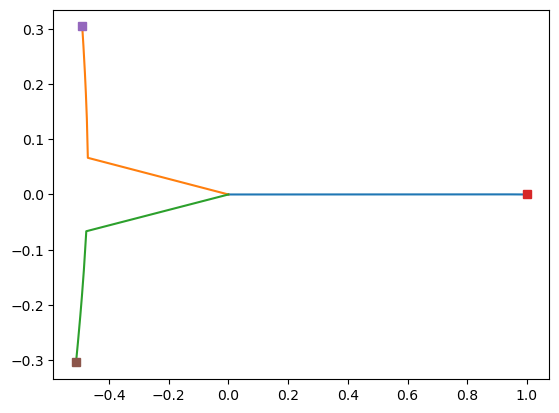

In [19]:
#visualiser une trajectoire random
k = np.random.choice(index_begin_trajectory) # exemple collision 514 1285 294008
print(k)
pltidx=range(k,k+257)#k+257 exclus
pltsquare = k
plt.plot(train.x_1[pltidx],train.y_1[pltidx])
plt.plot(train.x_2[pltidx],train.y_2[pltidx])
plt.plot(train.x_3[pltidx],train.y_3[pltidx])

plt.plot(train.x_1[pltsquare],train.y_1[pltsquare],'s')
plt.plot(train.x_2[pltsquare],train.y_2[pltsquare],'s')
plt.plot(train.x_3[pltsquare],train.y_3[pltsquare],'s')

In [20]:
test.head(260)

,Id,t,x0_1,y0_1,x0_2,y0_2,x0_3,y0_3
0,0,0.000000,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
1,1,0.039062,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
2,2,0.078125,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
3,3,0.117188,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
4,4,0.156250,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
...,...,...,...,...,...,...,...,...
255,255,9.960940,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
256,256,10.000000,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
257,257,0.000000,1.0,0.0,-0.061346,0.886386,-0.938654,-0.886386
258,258,0.039062,1.0,0.0,-0.061346,0.886386,-0.938654,-0.886386


In [21]:
test.columns,

(Index(['Id', 't', 'x0_1', 'y0_1', 'x0_2', 'y0_2', 'x0_3', 'y0_3'], dtype='object'),)

In [22]:
test.shape

(1041621, 8)

In [23]:
print(f"Nombre de points initiaux : {test.shape[0] // 257}")

Nombre de points initiaux : 4053


In [24]:
sample_submission.head(260)

,Id,x_1,y_1,x_2,y_2,x_3,y_3
0,0,-0.228877,-0.194306,-1.878604,-1.521913,0.255095,0.256084
1,1,1.566288,0.698060,0.038057,-0.569932,1.289377,-0.277511
2,2,0.191759,-0.911416,1.431736,-0.143101,-0.598665,-2.431377
3,3,0.460689,0.750665,1.010594,1.475047,0.307952,-0.784848
4,4,-0.560213,-0.261105,0.432813,1.326952,0.481754,-0.997106
...,...,...,...,...,...,...,...
255,255,-0.605577,0.043700,0.583765,-0.214975,-1.961186,0.795273
256,256,0.387436,-0.711031,0.461278,-0.728386,0.749362,-0.109080
257,257,-1.338486,-0.911780,-0.264529,-1.703823,-0.943546,-0.252946
258,258,0.742359,-0.317296,1.553284,-0.684047,2.229963,-0.877820


In [25]:
sample_submission.shape

(1041621, 7)

In [26]:
def dataset_summary(df):
    # --- Dimensions ---
    print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns\n")

    # --- Basic statistics ---
    print("Basic statistics per column:")
    desc = df.describe().T
    print(desc[['min', 'mean', 'max']])

    # --- Standard deviation ---
    desc['std'] = df.std()
    print("\nStandard deviation:")
    print(desc['std'])

    # --- Group columns ---
    coord_cols = [col for col in df.columns if col.startswith(('x_', 'y_'))]
    vel_cols = [col for col in df.columns if col.startswith(('v_x', 'v_y'))]

    # --- Boxplots (valeurs absolues en log, comme avant) ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Coordinates
    data_coord = [np.abs(df[c]) + 1e-8 for c in coord_cols]
    axes[0].boxplot(data_coord, tick_labels=coord_cols)
    axes[0].set_yscale('log')
    axes[0].set_title("Coordinates (x, y) - log scale (abs values)")
    axes[0].set_xlabel("Variables")
    axes[0].set_ylabel("Values (log scale)")

    # Velocities
    data_vel = [np.abs(df[c]) + 1e-8 for c in vel_cols]
    axes[1].boxplot(data_vel, tick_labels=vel_cols)
    axes[1].set_yscale('log')
    axes[1].set_title("Velocities (v_x, v_y) - log scale (abs values)")
    axes[1].set_xlabel("Variables")
    axes[1].set_ylabel("Values (log scale)")

    plt.tight_layout()
    plt.show()

    # --- Histogrammes simples (pas de log) ---
    def plot_raw_hist(df, cols, color, group_name):
        for col in cols:
            plt.figure(figsize=(6, 3))
            plt.hist(df[col], bins=50, color=color, edgecolor='black')
            plt.title(f"{col} - Raw distribution ({group_name})")
            plt.xlabel("Value")
            plt.ylabel("Frequency")
    
            # ➕ Afficher min et max
            min_val = df[col].min()
            max_val = df[col].max()
            plt.annotate(f"min: {min_val:.2e}", xy=(0.98, 0.95), xycoords='axes fraction',
                         ha='right', va='top', fontsize=9, color='red')
            plt.annotate(f"max: {max_val:.2e}", xy=(0.98, 0.88), xycoords='axes fraction',
                         ha='right', va='top', fontsize=9, color='red')
    
            plt.tight_layout()
            plt.show()


    # Coordinates
    plot_raw_hist(df, coord_cols, color='skyblue', group_name='Coordinates')

    # Velocities
    plot_raw_hist(df, vel_cols, color='lightcoral', group_name='Velocities')

Shape: 1285000 rows, 12 columns

Basic statistics per column:
             min      mean        max
t       0.000000  4.145262  10.000000
x_1   -30.823004 -0.281288  16.340610
y_1   -17.857729 -0.109516  26.276226
v_x_1 -72.993333 -0.184127  23.503455
v_y_1 -23.109278 -0.016500  34.671679
x_2   -30.833398  0.007171  15.506957
y_2   -52.450808 -0.082011  35.679463
v_x_2 -25.895550  0.032477  72.718229
v_y_2 -48.289007 -0.083608  23.118346
x_3   -17.439994  0.274117  61.656402
y_3   -33.159997  0.191527  27.735539
v_x_3 -30.970540  0.151650  25.964992

Standard deviation:
t        3.209813
x_1      1.695764
y_1      1.167686
v_x_1    0.877512
v_y_1    0.806417
x_2      1.062984
y_2      1.038606
v_x_2    0.936229
v_y_2    0.975178
x_3      1.443411
y_3      1.683294
v_x_3    0.787899
Name: std, dtype: float64


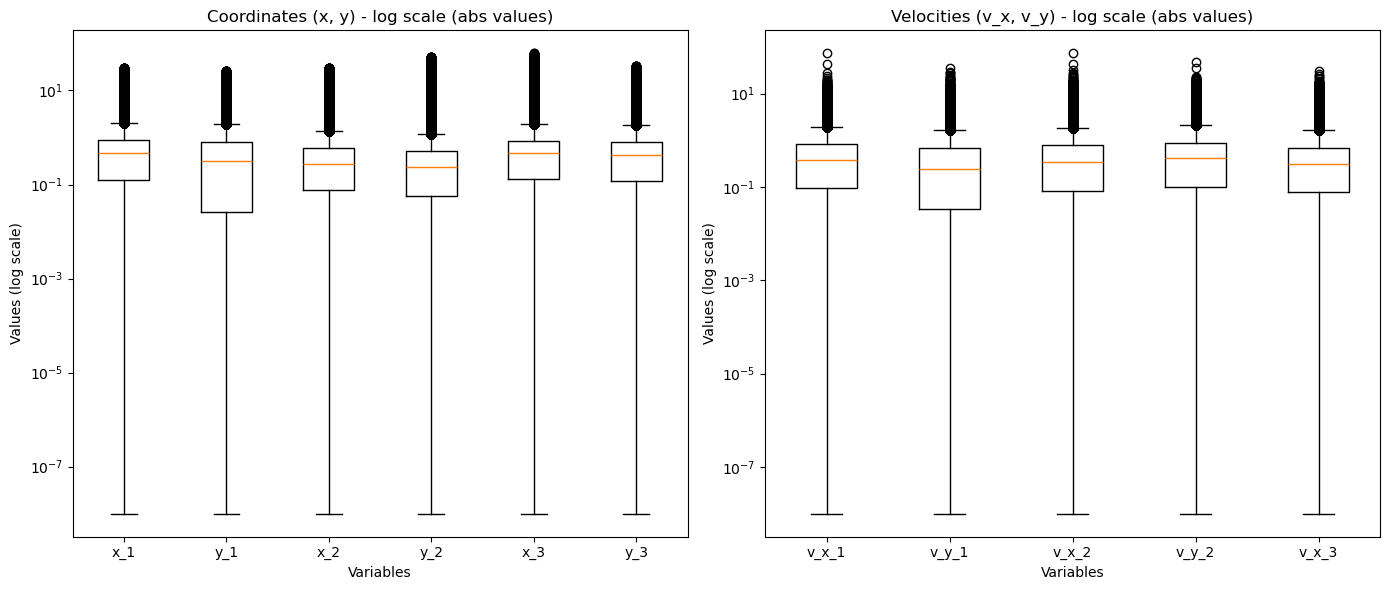

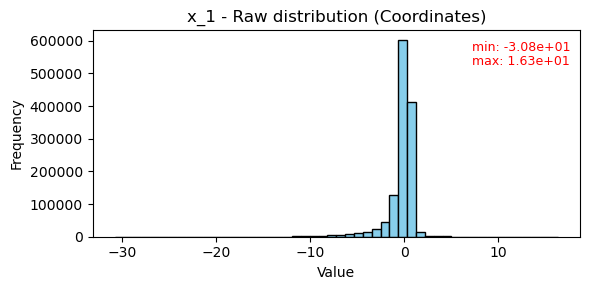

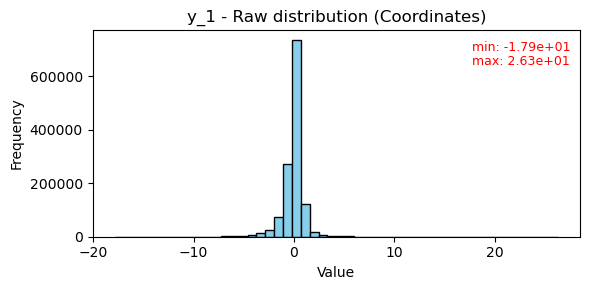

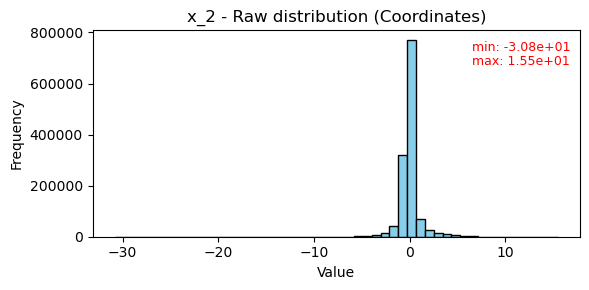

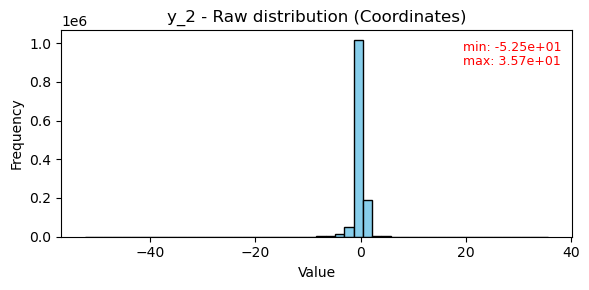

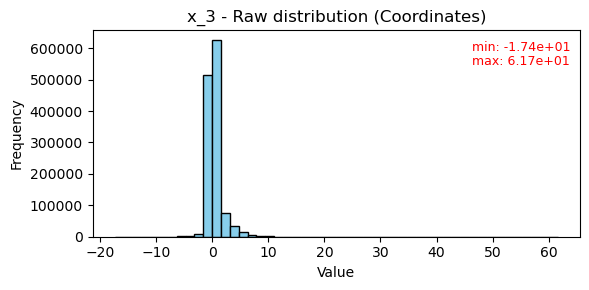

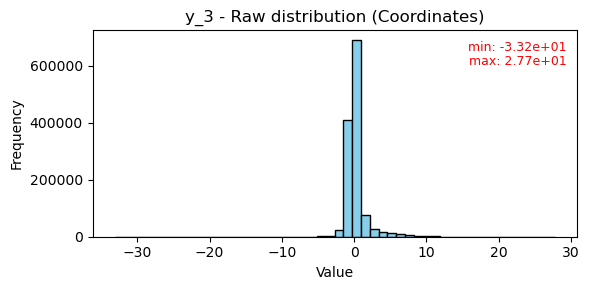

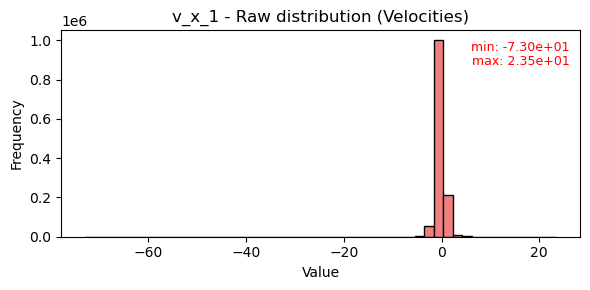

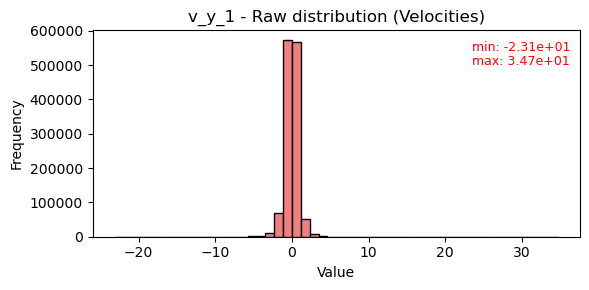

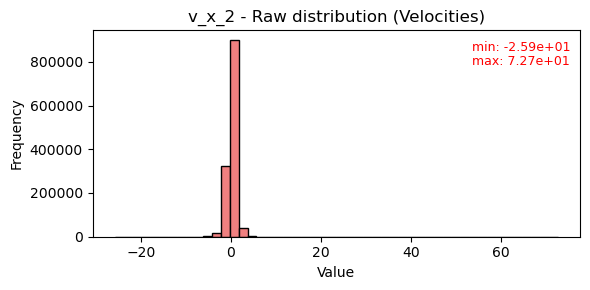

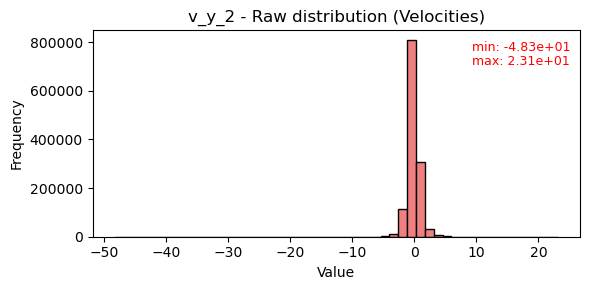

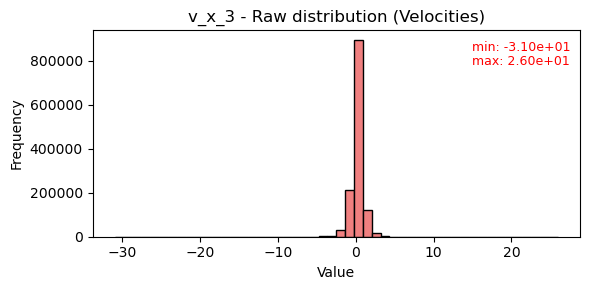

In [40]:
train = train.iloc[:, :-1]
dataset_summary(train)

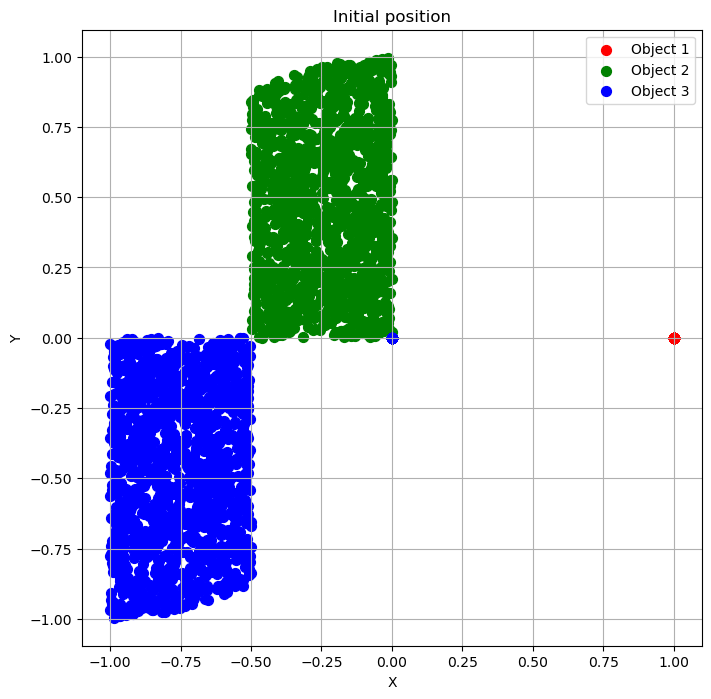

In [37]:
df_init = train[train['t'] == 0].head(50000)

plt.figure(figsize=(8,8))

# Tracer x1, y1 en rouge
plt.scatter(df_init['x_1'], df_init['y_1'], color='red', label='Object 1', s=50)

# Tracer x2, y2 en vert
plt.scatter(df_init['x_2'], df_init['y_2'], color='green', label='Object 2', s=50)

# Tracer x3, y3 en bleu
plt.scatter(df_init['x_3'], df_init['y_3'], color='blue', label='Object 3', s=50)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Initial position")
plt.legend()
plt.grid(True)
plt.axis('equal')  # pour conserver les proportions
plt.show()
